<a href="https://colab.research.google.com/github/joaovfin/Projetos/blob/main/04_Sharpe%2C_Beta%2C_Volatilidade%2C_Drawdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf
yf.pdr_override()

import seaborn as sns

In [ ]:
!pip install git+https://github.com/quantopian/pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

In [5]:
tickers=["ITSA4.SA","WEGE3.SA","TIET11.SA","VVAR3.SA","VALE3.SA","^BVSP"]

wallet=web.get_data_yahoo(tickers,period="3y")["Adj Close"]

wallet

[*********************100%***********************]  6 of 6 completed


,ITSA4.SA,TIET11.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2018-02-15,9.909328,8.673172,41.294773,7.908301,17.280199,84291.000000
2018-02-16,10.144003,8.548955,41.366665,7.788479,16.881594,84525.000000
2018-02-19,10.121292,8.658556,41.744122,7.728567,16.955414,84793.000000
2018-02-20,10.530082,8.833920,40.899349,7.598759,16.940647,85804.000000
2018-02-21,10.711762,8.709705,40.261280,7.668655,16.859447,86052.000000
...,...,...,...,...,...,...
2021-02-04,10.820000,16.760000,89.290001,15.000000,85.570000,119261.000000
2021-02-05,10.770000,16.920000,92.660004,15.060000,85.449997,119925.000000
2021-02-08,10.600000,16.920000,94.010002,15.220000,85.500000,119516.000000


In [6]:
retorno=wallet.pct_change()
retorno

,ITSA4.SA,TIET11.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2018-02-15,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-16,0.023682,-0.014322,0.001741,-0.015151,-0.023067,0.002776
2018-02-19,-0.002239,0.012820,0.009125,-0.007692,0.004373,0.003171
2018-02-20,0.040389,0.020253,-0.020237,-0.016796,-0.000871,0.011923
2018-02-21,0.017253,-0.014061,-0.015601,0.009198,-0.004793,0.002890
...,...,...,...,...,...,...
2021-02-04,0.000000,-0.004159,-0.012606,-0.005305,-0.034961,-0.003876
2021-02-05,-0.004621,0.009547,0.037742,0.004000,-0.001402,0.005568
2021-02-08,-0.015785,0.000000,0.014569,0.010624,0.000585,-0.003410


In [ ]:
retorno_acum=(1+retorno).cumprod()    
retorno_acum.iloc[0]=1
retorno_acum

In [8]:
carteira=1000*retorno_acum.iloc[:,:5]
carteira["Saldo"]=carteira.sum(axis=1)
carteira["Retorno"]=carteira["Saldo"].pct_change()
carteira

,ITSA4.SA,TIET11.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,Saldo,Retorno
Date,,,,,,,
2018-02-15,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,5000.000000,NaN
2018-02-16,1023.682274,985.678016,1001.740942,984.848516,976.932827,4972.882574,-0.005423
2018-02-19,1021.390413,998.314802,1010.881485,977.272653,981.204775,4989.064128,0.003254
2018-02-20,1062.643428,1018.533880,990.424360,960.858576,980.350231,5012.810474,0.004760
2018-02-21,1080.977737,1004.212225,974.972788,969.696911,975.651231,5005.510893,-0.001456
...,...,...,...,...,...,...,...
2021-02-04,1091.900504,1932.395695,2162.259148,1896.741074,4951.910533,12035.206954,-0.018367
2021-02-05,1086.854829,1950.843369,2243.867606,1904.328091,4944.966010,12130.859905,0.007948
2021-02-08,1069.699268,1950.843369,2276.559358,1924.559977,4947.859672,12169.521643,0.003187


Start date,2018-02-15
End date,2021-02-10
Total months,35
,Backtest
Annual return,35.204%
Cumulative returns,141.888%
Annual volatility,31.623%
Sharpe ratio,1.12
Calmar ratio,0.83
Stability,0.82
Max drawdown,-42.189%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,42.19,2020-03-04,2020-03-18,2020-07-02,87
1,17.47,2018-04-27,2018-06-21,2019-01-24,195
2,12.11,2019-01-24,2019-05-16,2019-06-19,105
3,11.05,2020-02-26,2020-02-28,2020-03-04,6
4,10.99,2020-07-22,2020-09-23,2020-10-13,60


Stress Events,mean,min,max
New Normal,0.14%,-15.03%,11.11%


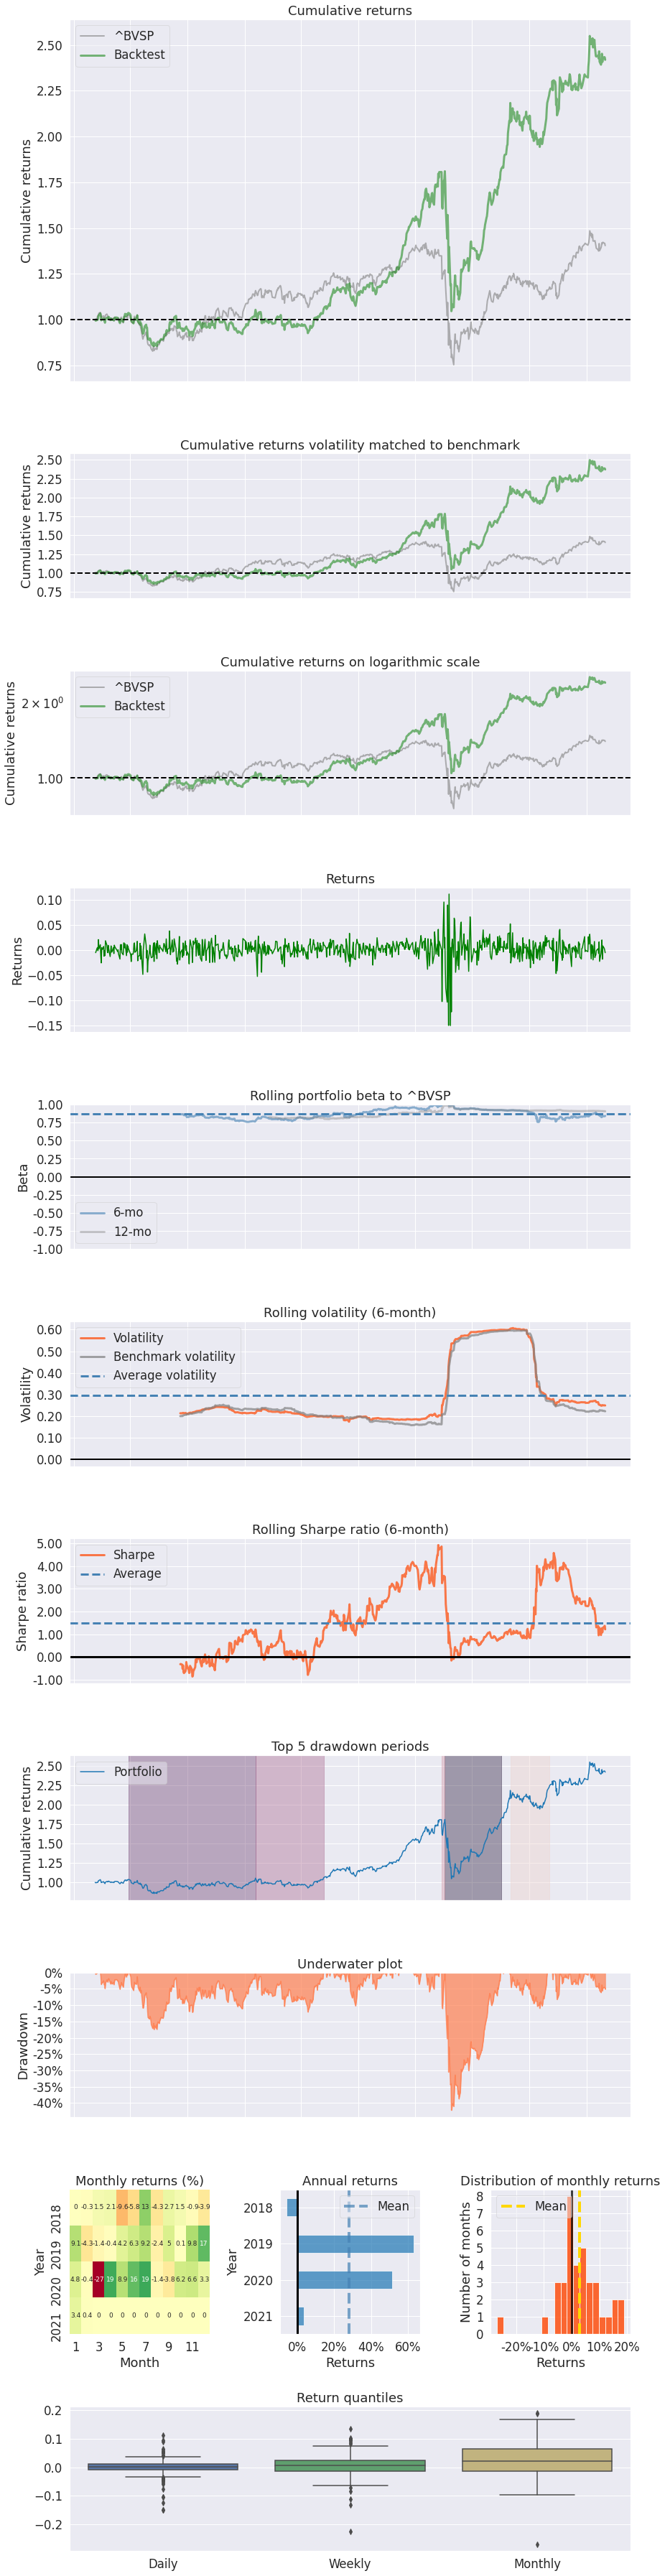

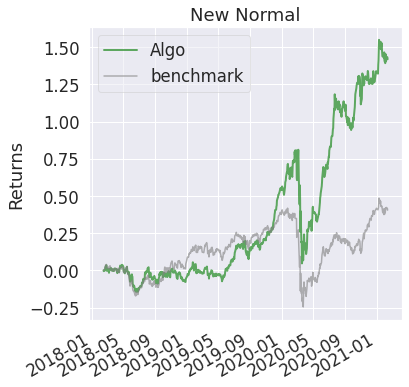

In [9]:
pf.create_full_tear_sheet(carteira["Retorno"],benchmark_rets=retorno["^BVSP"])

(0.7, 1.2)

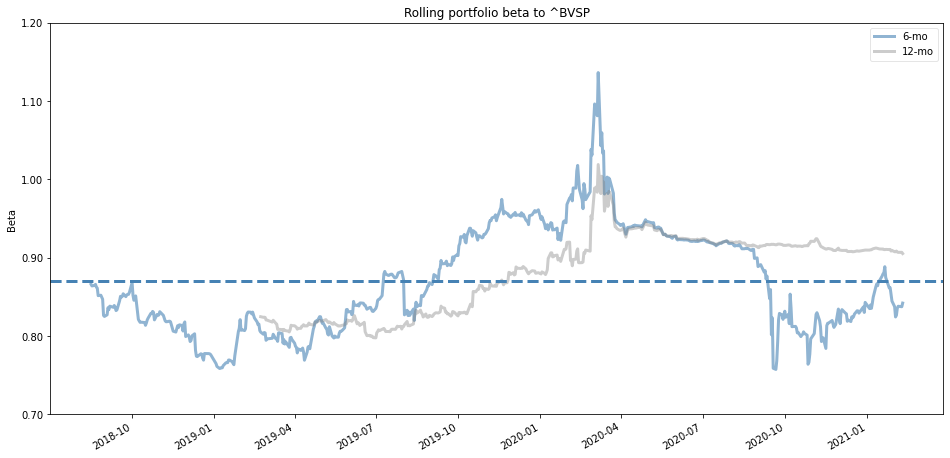

In [13]:
fig, ax1=plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["Retorno"], factor_returns=retorno["^BVSP"],ax=ax1)
plt.ylim((0.7,1.2))